In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:/data/Social_Network_Ads.csv').values

In [3]:
x = dataset[:,:-1]
y = dataset[:,-1]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
xsc_train = sc.transform(x_train)
xsc_test = sc.transform(x_test)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xsc_train,y_train)

LogisticRegression()

In [7]:
y_pred = lr.predict(xsc_test)

In [8]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print('accuracy: ',acc*100)

accuracy:  86.0


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred) # [TN, FP]
tn = cm[0,0]                         # [FN, TP] 형태임
fp = cm[0,1]
fn = cm[1,0]
tp = cm[1,1]
print(cm)

[[61  2]
 [12 25]]


In [12]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print('precision: ',precision*100)
print('recall: ',recall*100)

precision:  92.5925925925926
recall:  67.56756756756756


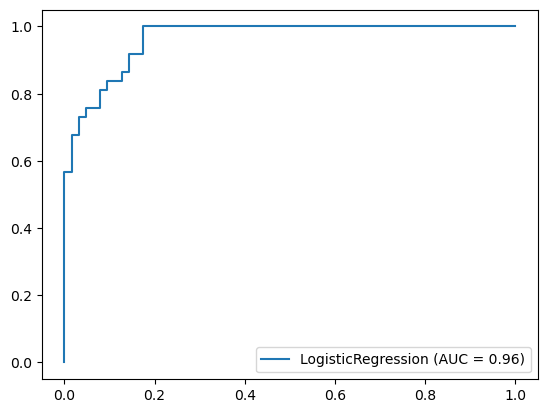

In [22]:
from sklearn.metrics import roc_curve,auc
y_pred_proba = lr.predict_proba(xsc_test)
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba[:,1]) # y_pred_proba[:,1] = 모델의 결과 중 x에 대해서 y가 1일 확률
lr_auc = auc(fpr,tpr)
label = 'LogisticRegression (AUC = {})'.format(round(lr_auc,2))
plt.plot(fpr,tpr,label=label)
plt.legend()